In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
m1 = [4, 4]
m2 = [8, 8]

cov1 = [[1, 0], [0, 1]]
cov2 = [[2, .5], [.5, 2]]

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 300)

In [8]:
ones = np.full((dist1.shape[0], 1), 1)
twos = np.full((dist2.shape[0], 1), 2)

In [9]:
cat1 = np.hstack([ones, dist1])
cat2 = np.hstack([twos, dist2])

In [11]:
dist = np.vstack([cat1, cat2])

In [12]:
from sklearn.datasets import make_blobs

In [34]:
X, y = make_blobs?

In [ ]:
X, y = make_blobs

In [ ]:
X, y = make_blobs

In [79]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

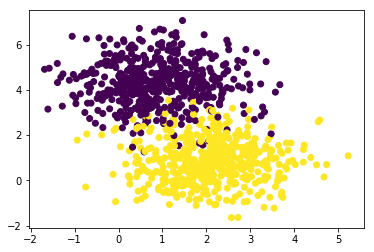

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [81]:
class KNN:
    
    def __init__(self, k=10):
        self.X = None
        self.y = None
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, points):
        
        res = []
        
        for point in points:
            res.append(self.predict_point(point))
            
        return np.array(res, dtype=int)
    
    def predict_point(self, point):
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis, y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def accuracy(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1 - p2) ** 2)
    

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
model = KNN(10)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
model.fit(X_train, y_train)

In [86]:
# for point in X_test[:10]:
#     print(model.predict(point))

sum(model.predict(X_test) == y_test) / len(y_test)


0.9484848484848485

In [87]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [88]:
model.accuracy(X_test, y_test)

0.9484848484848485

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
model = KNeighborsClassifier?

In [91]:
model = KNeighborsClassifier(10)

In [92]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [93]:
model.score(X_test, y_test)

0.9484848484848485

In [94]:
model.predict(X_test[:10])

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])